In [51]:
# Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [41]:
# Importing data
Train = pd.read_csv('TrainScaled.csv').drop(columns='Unnamed: 0')
Test = pd.read_csv('TestScaled.csv').drop(columns='Unnamed: 0')
Train.head()

,gdp_per_capita ($),gdp_for_year ($),age,sex,generation,population-1,suicides_no-1,country,year,suicideRate
0,-0.587214,-0.157569,0.228086,0.823055,0.126435,0.247609,0.020860,Argentina,2010,7.831615
1,-0.915488,-0.344502,0.228086,0.823055,0.126435,-0.446805,-0.407847,Armenia,2010,2.727723
2,1.005540,-0.171885,0.228086,-1.214986,0.126435,-0.340891,-0.222342,Austria,2010,15.862616
3,0.209667,-0.344125,0.228086,0.823055,0.126435,-0.494388,-0.414965,Bahamas,2010,2.995187
4,-0.112472,-0.337079,0.228086,-1.214986,0.126435,-0.478974,-0.410422,Bahrain,2010,1.667896


In [42]:
# Dividing into X and Y
yTrain =  Train['suicideRate'].copy()
yTest =  Test['suicideRate'].copy()
XTrain = Train.drop(columns='suicideRate').copy()
XTest = Test.drop(columns='suicideRate').copy()
XTrain.head()

,gdp_per_capita ($),gdp_for_year ($),age,sex,generation,population-1,suicides_no-1,country,year
0,-0.587214,-0.157569,0.228086,0.823055,0.126435,0.247609,0.020860,Argentina,2010
1,-0.915488,-0.344502,0.228086,0.823055,0.126435,-0.446805,-0.407847,Armenia,2010
2,1.005540,-0.171885,0.228086,-1.214986,0.126435,-0.340891,-0.222342,Austria,2010
3,0.209667,-0.344125,0.228086,0.823055,0.126435,-0.494388,-0.414965,Bahamas,2010
4,-0.112472,-0.337079,0.228086,-1.214986,0.126435,-0.478974,-0.410422,Bahrain,2010


In [43]:
# Parameters
trainCountries = len(XTrain['country'].unique())
testCountries = len(XTest['country'].unique())
times = len(XTrain['year'].unique())
variables = len(XTrain.drop(columns=['year', 'country']).columns)
print(trainCountries, testCountries, times, variables)

52 23 4 7


In [44]:
# Reshaping X
idTrain = XTrain[['country', 'year']].copy()
idTest = XTest[['country', 'year']].copy()
XTrain = np.reshape(XTrain.drop(columns=['country', 'year']), (trainCountries, times, variables))
XTest = np.reshape(XTest.drop(columns=['country', 'year']), (testCountries, times, variables))
XTrain[0]

array([[-0.58721433, -0.15756899,  0.22808578,  0.82305489,  0.12643493,
         0.24760898,  0.02085991],
       [-0.91548779, -0.34450159,  0.22808578,  0.82305489,  0.12643493,
        -0.44680453, -0.40784728],
       [ 1.00554006, -0.17188539,  0.22808578, -1.21498579,  0.12643493,
        -0.3408907 , -0.22234169],
       [ 0.20966706, -0.34412469,  0.22808578,  0.82305489,  0.12643493,
        -0.49438803, -0.41496464]])

In [45]:
# Rehsaping Y
yTrain = np.reshape(yTrain, (trainCountries, 4, 1))
yTest = np.reshape(yTest, (testCountries, 4, 1))

Im creating 3 architectures for modeling: LSTM, GRU and a mix of them. Before modelling, a weights initializer will be set for all RNN.

In [46]:
initializer = keras.initializers.GlorotNormal(seed=1234)

In [83]:
# LSTM
LSTM = keras.models.Sequential()
LSTM.add(keras.layers.LSTM(units=100, input_shape=(times, variables), kernel_initializer=initializer))
LSTM.add(keras.layers.Dense(units=1, activation='linear'))
LSTM.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 100)               43200     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 43,301
Trainable params: 43,301
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Training
LSTM.compile(loss='mean_squared_error', optimizer='adam')
historyLSTM = LSTM.fit(XTrain, yTrain, validation_data=(XTest, yTest), epochs=50, batch_size=32)

Epoch 1/50
2/2 [==============================] - 1s 337ms/step - loss: 183.9589 - val_loss: 198.4637
Epoch 2/50
2/2 [==============================] - 0s 35ms/step - loss: 183.0377 - val_loss: 197.5786
Epoch 3/50
2/2 [==============================] - 0s 51ms/step - loss: 182.1752 - val_loss: 196.6732
Epoch 4/50
2/2 [==============================] - 0s 42ms/step - loss: 181.2722 - val_loss: 195.8280
Epoch 5/50
2/2 [==============================] - 0s 33ms/step - loss: 180.3332 - val_loss: 194.8726
Epoch 6/50
2/2 [==============================] - 0s 33ms/step - loss: 179.2744 - val_loss: 193.8195
Epoch 7/50
2/2 [==============================] - 0s 22ms/step - loss: 178.1628 - val_loss: 192.6573
Epoch 8/50
2/2 [==============================] - 0s 27ms/step - loss: 176.9267 - val_loss: 191.3590
Epoch 9/50
2/2 [==============================] - 0s 21ms/step - loss: 175.5419 - val_loss: 189.8875
Epoch 10/50
2/2 [==============================] - 0s 24ms/step - loss: 173.7054 - val_los

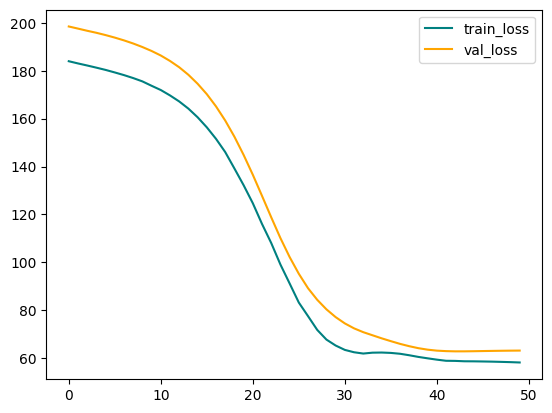

In [85]:
# Plotting loss
plt.plot(historyLSTM.history['loss'], color='teal', label='train_loss')
plt.plot(historyLSTM.history['val_loss'], color='orange', label='val_loss')
plt.legend(loc='best')
plt.show()